In [1]:
import face_recognition
from sklearn import svm
import os
from PIL import Image, ImageDraw
from IPython.display import display

In [2]:
encodings = []
names = []

# Training directory
train_dir = os.listdir('./train_dir')

In [3]:
for person in train_dir:
    pix = os.listdir("./train_dir/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file("./train_dir/" + person + "/" + person_img)
        face_bounding_boxes = face_recognition.face_locations(face)

        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
        else:
            print(person + "/" + person_img + " was skipped and can't be used for training")

In [ ]:
print(names)

Number of faces detected:  1
Found:
person_1


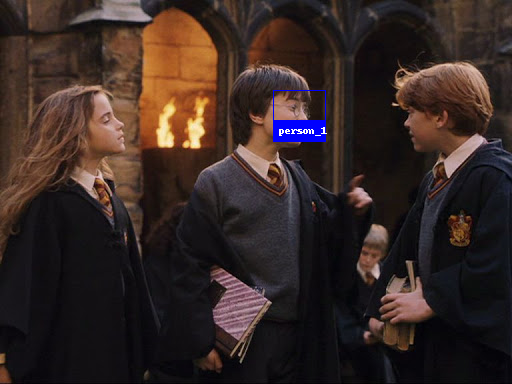

In [11]:
# Create and train the SVC classifier
clf = svm.SVC(gamma='scale')
clf.fit(encodings,names)

# Load the test image with unknown faces into a numpy array
test_image = face_recognition.load_image_file('./examples/test_image.jpg')

show_img = Image.fromarray(test_image)
draw = ImageDraw.Draw(show_img)
# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image, model='knn')
no = len(face_locations)
print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    (top, right, bottom, left)=face_locations[i]
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict([test_image_enc])
    print(*name)
    name=str(*name)
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255))
    
del draw
display(show_img)